# Introduction 

These notebooks contain experiments for the paper `Do Large Language Models understand literature? Case studies and probing experiments on German poetry.` 

After some pre-studies we decided not to use open source models like Llama 3.1:70b, because they didn't perform as well as the commercial models offered by OpenAI, Google and Anthropic. Llama 3.1:405b wasn't an option because we didn't have access to an infrastructure able to run it. 

Our selection was based on evaluations of these models on Chatbot Arena (1.11.2024): https://lmarena.ai/ 

List of LLMs used: 

* OpenAi: ChatGPT-4o (gpt-4o-2024-08-06)
* Anthropic Claude 3.5 Sonnet 2024-10-22
* Google Gemini 1.5 Pro (Sep 2024)


# Two texts
We are using two texts. One is a very well-known poem, 'Hälfte des Lebens' ('The middle of life') by Friedrich Hölderlin, a very famous German poet from the early 19th Century. There are many representations of this poems in German and English online and also many interpretations. 
The other poem, 'Unsere Toten', by Hans Pfeifer, is unknown to Google at the time of writing and has not been published again after its first publication 1922. The author is also not a known figure in literary history. 

* How well do the models know Hölderlin's text?
* Does it matter, whether a model knows a text or not? Is the information used when producing new text about the reference text?
* How well does the recognition of the text type work?
* How relevant is the information about the text type?

# Configuration

In [ ]:
import os

from definitions import poem_1, poem_2
from utils import settings, gemini, gpt4, opus, init_gemini, printmd
import utils

%load_ext jupyter_ai_magics

In [ ]:
#settings
temperature = 0.8
system_prompt = "You are an expert in German literature. You answer the questions truthfully and short."

settings(system_prompt, temperature)
    

In [ ]:
#defining aliases
init_gemini()

model =  gpt4()
%ai register gpt4o model

model = opus()
%ai register opus model 

# The Poems to be analyzed in the paper:

## Friedrich Höderlin: Hälfte des Lebens (1804)

Mit gelben Birnen hänget 

Und voll mit wilden Rosen 

Das Land in den See, 

Ihr holden Schwäne, 

Und trunken von Küssen 

Tunkt ihr das Haupt 

Ins heilignüchterne Wasser.

--

Weh mir, wo nehm’ ich, wenn 

Es Winter ist, die Blumen, und wo 

Den Sonnenschein, 

Und Schatten der Erde? 

Die Mauern stehn 

sprachlos und kalt, im Winde 

klirren die Fahnen.

--

First published in 1804 in Friedrich Wilman's "Taschenbuch für das Jahr 1805"

In: Friedrich Hölderling: Gesammelte Werke. Herausgegeben von Hans Jürgen Balmes. Frankfurt am Main: Fischer, p. 163.

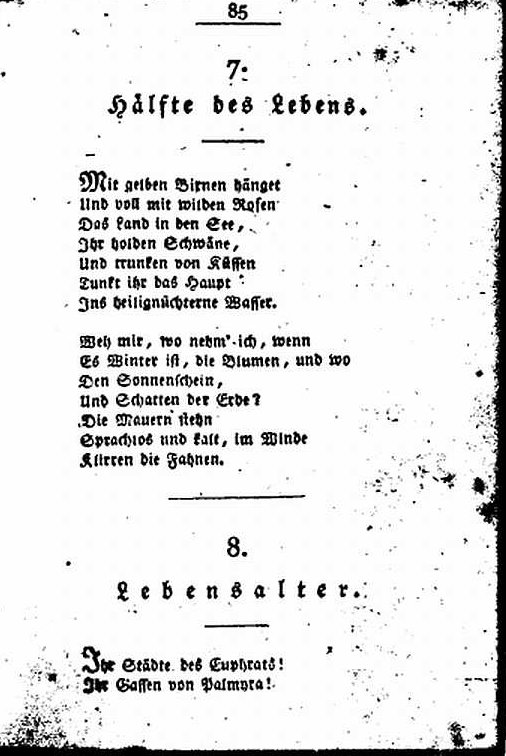

## Hans Pfeifer: Unsere Toten (1922)

Von Westen und Osten, von Nord und Süd

Schleppen sich nächtens viele Füße müd,

Füße, vom Wandern wund und zerfetzt,

Langsam bedächtig zur Erde gesetzt,

Müh'n sich im zitternden Mondenschein

Rastlos tief nach Deutschland hinein.

Und wer mit lauschendem Ohr noch wacht

Hört sie in jedweder werdenden Nacht,

Hört dies Schlurfen so müde und schwer,

Hört eine Klage voll wilder Begehr,

Eine Klage schmerzzerfressen:

Nur nicht vergessen! Uns nicht vergessen!


In: Uhlmann-Bixterheide, Wilhelm, ed. (1922). Die deutsche Balladen-Chronik. Ein Balladenbuch von deutscher Geschichte und deutscher Art. Dortmund: Ruhfus, p. 290. 

The texts and several translations into English can be found in the `definitions.py`.

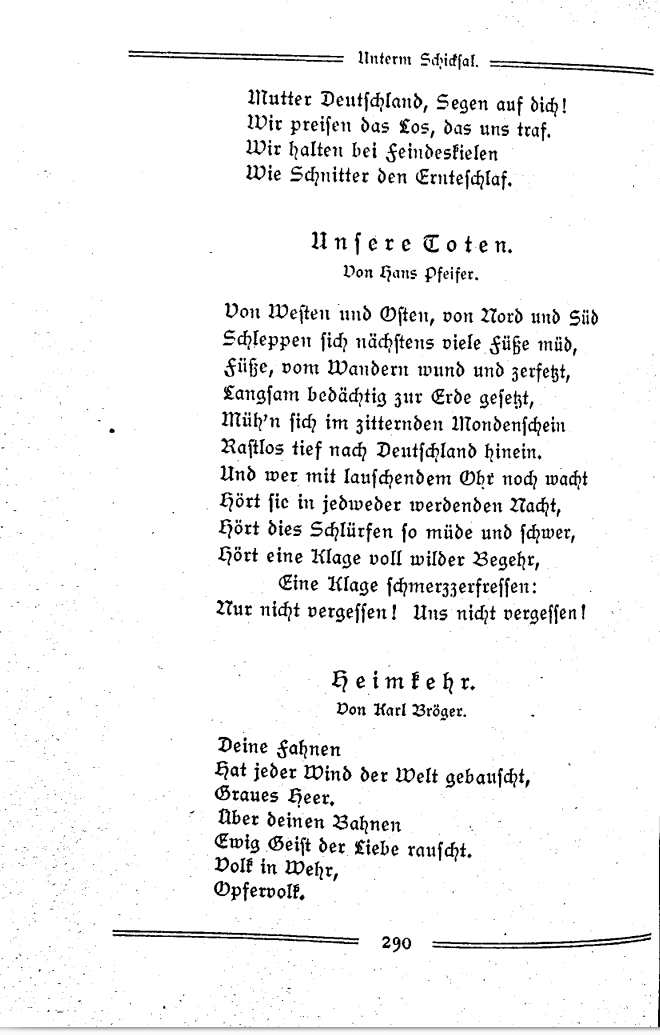

# Text type 'poem'

Task: Do the models recognize the text and the text type?

## Hälfte des Lebens

In [ ]:
t1 = """
Mit gelben Birnen hänget und voll mit wilden Rosen das Land 
in den See, ihr holden Schwäne, und trunken von Küssen 
tunkt ihr das Haupt ins heilignüchterne Wasser.  
Weh mir, wo nehm’ ich, wenn es Winter ist, die 
Blumen, und wo den Sonnenschein, und Schatten der Erde? Die 
Mauern stehn sprachlos und kalt, im Winde klirren die Fahnen.
"""

In [ ]:
prompt = f"""I found this text in an old folder with stuff from my family. 
What kind of news text is it? Here is the text: {t1}"""

In [ ]:
%%ai opus
{prompt}

In [ ]:
%%ai gpt4o
{prompt}

In [ ]:
printmd(gemini(prompt))

## Unsere Toten

In [ ]:
t2 = """
Von Westen und Osten, von Nord und Süd schleppen sich nächtens viele Füße müd, Füße, vom Wandern 
wund und zerfetzt, langsam bedächtig zur Erde gesetzt, müh'n sich im zitternden Mondenschein rastlos 
tief nach Deutschland hinein. Und wer mit lauschendem Ohr noch wacht hört sie in jedweder werdenden 
Nacht, hört dies Schlurfen so müde und schwer, hört eine Klage voll wilder Begehr, eine Klage 
schmerzzerfressen: nur nicht vergessen! Uns nicht vergessen!
"""

In [ ]:
prompt = f"""
I found this text in an old folder with stuff from my family. 
What kind of news text is it? Here is the text: {t2}
"""

In [ ]:
%%ai opus
{prompt}

In [ ]:
%%ai gpt4o
{prompt}

In [ ]:
printmd(gemini(prompt))